### Validación de supuestos 

In [ ]:
install.packages("nortest",dependencies = TRUE)
install.packages('car',dependencies = TRUE) 
install.packages('faraway',dependencies = TRUE) 
install.packages('tseries',dependencies = TRUE) 

In [77]:
#Cargar las bibliotecas
library(faraway)#linealidad 
library(tseries)#acf 
library(nortest) #test de normalidad 
library(car) #para qqPlot y levene 

In [78]:
dataset=read.csv('UScrime.csv',sep = ',',header = TRUE)
#y=dataset[,1]
X=subset(dataset, select = -y)
dataset[1:2,]
dim(dataset)

y,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
79.1,151,1,91,58,56,510,950,33,301,108,41
163.5,143,0,113,103,95,583,1012,13,102,96,36


[1] 47 12

Vamos a considerar el modelo 
$$
y=\beta_0 + \beta_1 M + \beta_2 So +\beta_3 Ed + \beta_4 Po1 + \beta_5 Po2 + \beta_6 LF + \beta_7 M.F + \beta_8 Pop + \beta_9 NW +\beta_{10} U1 + \beta_{11} U2
$$


1. M: porcentaje de hombres entre 14-24
2. So: variable indicadora si el estado es del sur o no 1=sur, 0=norte
3. Ed: Escolaridad media en años 
4. Po1: gasto policial (percapita) en el año actual
5. Po2: gasto policial (percapita) en el año anterior
6. LF:tasa de participación en la fuerza de trabajo(población activa)
7. M.F: numero de hombres por cada 1000 mujeres
8. Pop: poblacion del estado
9. NW:numero de personas no blancas por cada 1000 habitantes
10. U1:tasa de desempleo urbano de hombres entre 14-24
11. U2:tasa de desempleo urbano de hombres entre 35-39

In [90]:
modelo=lm(y~., data=dataset)
summary(modelo)


Call:
lm(formula = y ~ ., data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.130 -15.556  -2.112  10.491  56.166 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -596.71394  170.29578  -3.504  0.00127 **
M              1.02761    0.47702   2.154  0.03819 * 
So            10.03006   15.81406   0.634  0.53004   
Ed             1.13539    0.67741   1.676  0.10264   
Po1            1.80551    1.19875   1.506  0.14100   
Po2           -1.08336    1.29258  -0.838  0.40764   
LF             0.06027    0.17054   0.353  0.72592   
M.F            0.31728    0.23305   1.361  0.18208   
Pop            0.08560    0.14082   0.608  0.54722   
NW             0.03408    0.06886   0.495  0.62378   
U1            -0.68007    0.49300  -1.379  0.17651   
U2             1.98806    0.95328   2.086  0.04438 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.9 on 35 degrees of freedom
Multiple R-squared:  0.

#### Linealidad 
$\textbf{Residuales Parciales.}$ Sea $x_j$ una covariable, los residuos parciales son aquellos que se obtienen cuando se precinde de la covariable $x_j$ en el ajuste,  
$$
e^{*}_{ij}=y_i-\sum_{k\neq j}\hat{\beta}_kx_{ik}=e_i+\hat{\beta}_jx_{ij}\hspace{0.5cm}i=1,...,n
$$
Se grafica los residuales del modelo ajustado sin la covariable $x_j$ contra esta covarivable, si la relación entre $x_j$ e $Y$ es lineal se espera que ésta gráfica presente una relación lineal. 

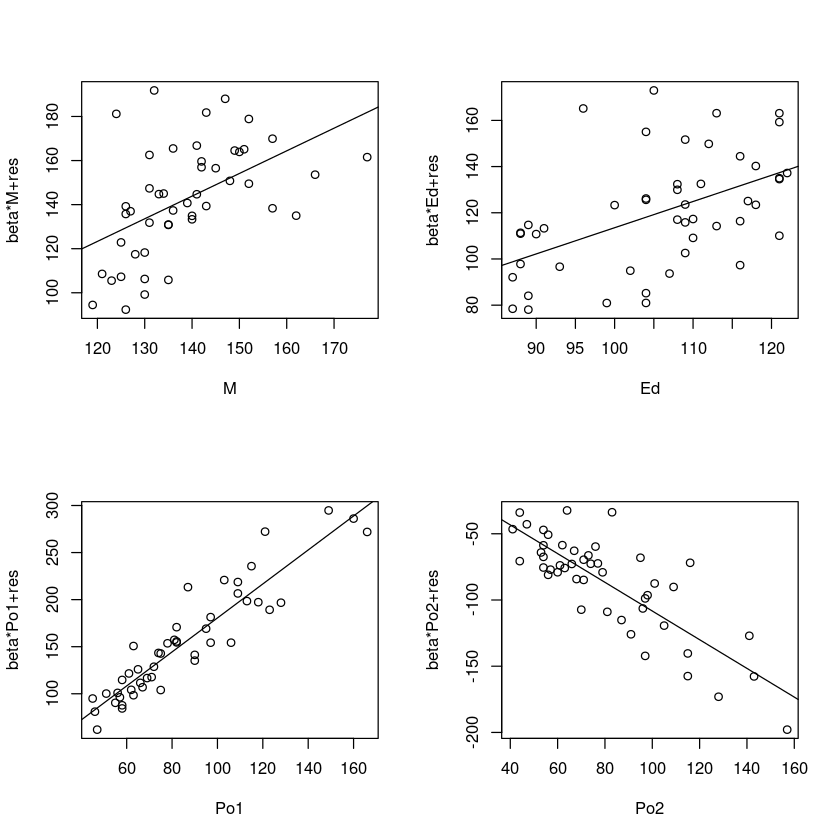

In [83]:
options(repr.plot.width=7, repr.plot.height=7)
opar=par(mfrow=c(2,2))
# Residuos parciales para 1,3,4,5
prplot(modelo,1)
prplot(modelo,3)
prplot(modelo,4)
prplot(modelo,5)
Xpar(opar)

In [ ]:
X  Y
2  1 1.5
3  4  3
4  3   


[1,2,3,4,5,6,7,8,10]

#### Independencia de los errores
$\textbf{La autocorrelación}$ de una serie de datos discreta de un proceso $X_t$ no es más
que el coéficiente de correlación de dicho proceso con una versión desplazada de la propia
serie Sea $e_1,...e_n$ una serie de datos el coeficiente de autocorrelación es:

$$
    \rho_k=\dfrac{\sum_{i=1}^{n-k}(e_i-\bar{e})(e_{i-k}-\bar{e})}{\sum_{i=1}^{n-k}(e_i-\bar{e})^2}
$$
Si $\rho_k$ se aleja del valor 0 hay evidencia de que cada k observaciones hay un patrón de los
residuales pues dichas observaciones están muy correlacionadas lo que implicará dependencia
de los residuales. Entoncesla idea es contrastar $\rho_k=0$ vs $\rho_k\neq 0$ . R tiene programada la prueba en la función $acf$.
En la siguiente gráfica se espera que todas las correlaciones estén dentro de la banda de confianza, salvo por la primera que toma el valor de 1. Si para alguna observación se sale de la banda de confianza se dice que se encontro una correlación estadísticamente significativa y hay un patrón en los residuales. 


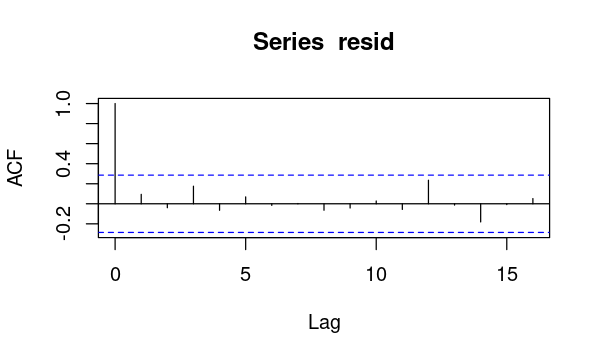

In [85]:
options(repr.plot.width=5,repr.plot.height=3)
resid = modelo$res
# Prueba de Independencia
acf(resid) 

Otra manera de probar la independencia de los residuales es probar la aleatoriedad con la que van cambiando los signos.

$\textbf{Una racha}$ se define como una secuencia de valores muestrales con una característica común precedida y seguida por valores que no presentan esa característica.
 La idea de la prueba es contar el número de rachas en la muestra, en este caso cambios de signo, luego un número reducido
o grande de rachas es indicio de que las observaciones no se han obtenido de forma aleatoria.
Aquí la hipótesis nula es que la muestra es aleatoria y se pretenden tener $\mathtt{p-values}$ grandes para no rechazar la hipótesis nula. Como podemos observar en nuestro caso se satisface el supuesto.

In [86]:
runs.test(as.factor(resid > 0))


	Runs Test

data:  as.factor(resid > 0)
Standard Normal = -1.2635, p-value = 0.2064
alternative hypothesis: two.sided


#### Varianza Constante de los residuales  
Otro de los supuestos que necesitamos verificar es la Homocedásticidad (igualdad de varianzas), para ello usaremos dos pruebas formales que son la de Barttlet y Levené, ambos suponen normalidad. Y adémas se requiere tener definidos grupos. Las hipótesis nula es que los grupos son hómocedasticos. Y se pretende no rechazar $H_0$
Para el caso de Barttlet tenemos que tener definido grupos en el vector de residuales.

In [94]:
grupo = c(rep(1, 15), rep(2, 15), rep(3,17))
bartlett.test(resid, grupo)


	Bartlett test of homogeneity of variances

data:  resid and grupo
Bartlett's K-squared = 0.90296, df = 2, p-value = 0.6367


La idea que hay de tras de la prueba de Levené es utilizar el ANOVA para probar iguadad de las varianzas en cada grupo. 

In [51]:
grupo = as.factor(c(rep(1, 15), rep(2, 15), rep(3,17)))
leveneTest(resid, grupo)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.4715546,0.6271485
,44,NA,NA


#### Normalidad de los residuales 
Para hacer la prueba de Normalidad de los residuales contamos con varias pruebas de bondad de ajuste como son:
1. Shapiro-Wilk Normality Test 
2. Anderson-Darling test for normality 
3. Liliiefors for normality. 

La finalidad de todas pruebas es contrastar la hipótesis
$$
H_0:e_i\sim N(\mu,\sigma^2) \hspace{1cm} H_0:e_i\nsim N(\mu,\sigma^2) 
$$
Primero haremos un histograma y la gráfica qqplot. 

[1] 11 23

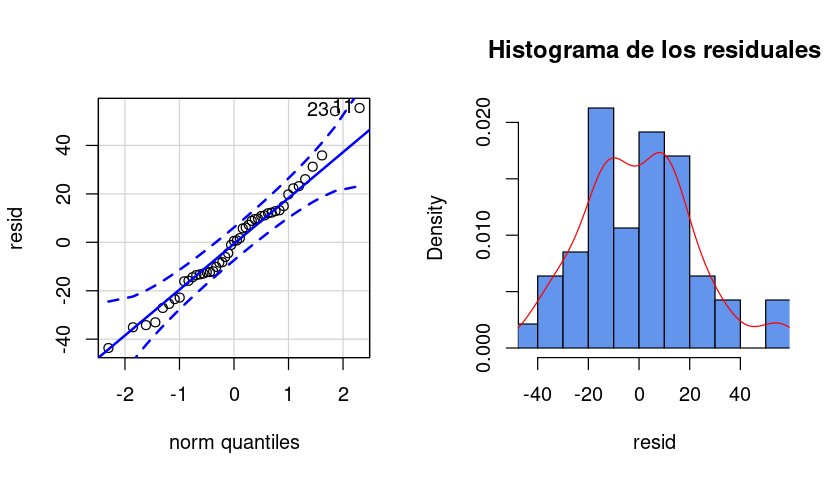

In [52]:
opar=par(mfrow=c(1,2))
options(repr.plot.width=7,repr.plot.height=4)
qqPlot(resid)
hist(resid,freq=FALSE, breaks=8, main="Histograma de los residuales",
     col="cornflowerblue",xlim = c(min(resid), max(resid)))
lines(density(resid),col="red")
par(opar)

In [43]:
ad.test(resid)
lillie.test(resid)
cvm.test(resid)


	Anderson-Darling normality test

data:  resid
A = 0.3218, p-value = 0.519



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  resid
D = 0.079691, p-value = 0.6409



	Cramer-von Mises normality test

data:  resid
W = 0.047261, p-value = 0.5435


#### Multicolinearidad 
En los supuestos de la regresión se pidioque la matriz $X$ fuese de rango completo por lo que debemos verificar que no existan columnas que sean combinaciones lineales de otras. 
Verificar la multicolineridad no es facil a simple vista sin embargo existen formas de detectarla.
1. Una forma muy simple para detectar multicolinearidad es inspeccionar la matriz de correlaciones entre las variables explicativas. ( cor(X) , pairs(X))
2. Hacer regresiones lineales de Xq con el resto de las variables y obtener el coeficiente de determinación de dicha regresión $R_q^2$ , un coeficiente de deteminación cercana a 1 nos dice que hay un ajuste muy bueno por lo que se puede decir que existe apfroximadamente una combinación lineal de estas variables. 
Una forma de obtener indices es calcular lo que se denomina el V IFq (Factor de Inflación de la varianza) definido como:
$$
VIF_q=\dfrac{1}{1-R^2}\hspace{1cm}q\in{0,..,k}
$$
Entonces si $R_q^2\approx 1$ eso se traduce en un $VIF_q$ grande, en la práctica se suele tomar como punto de corte 5 o 10, es decir obtener un $VIFq > 10$ nos habla de que la variable Xq puede ser expresada aproximadamente como combinación lineal de las restantes y por tanto podemos tener problemas númericos en las estimaciones.

In [13]:
vif(modelo)

M       So       Ed      Po1       LF      M.F      Pop       U1 
2.400483 3.069705 4.437293 4.195089 2.926251 3.284355 2.125431 5.730733 
      U2      GDP 
4.917711 5.878972

Prácticamente para todas las observaciones el $VIF$ son menores que $10$ no tenemos problemas

#### Outliers y Observaciones influyentes
Hay dos propósitos principales para tratar de identificar las observaciones que no pertenecen al
modelo
1. Proteger la integridad del modelo de los efectos de los puntos que no pertenecen a éste. (Observaciones que no pertenecen al modelo) Frecuentemente exhiben residuales grandes.
2. Identificar las deficiencias del modelo.

El primer paso para identificar observaciones atípicas es tener una idea de la región en donde
estamos muestreando, la idea es encontrar una métrica que nos ayude a decidir si una observación de
las variables independientes está muy alejada de la región de muestreo. En general una observación
que se encuentra lejos de donde esta la masa de puntos ocasiona que el modelo cambie de manera
significativa (Aunque no necesariamente).

Para detectar los puntos de muestreo que están alejados se utiliza la matriz sombrero. A los elementos de la diagonal de $H (h_{ii})$ se les conoce como el leverage o la inuencia de cada observación. De este modo un leverage grande nos habla de una observación alejada de la masa de los puntos de muestreo. En promedio los leverages toman el valor de $p/n$. Existe una regla muy utilizada que dice que aquellos $h_{ii}$ que sean mayores a dos veces al promedio son puntos alejados y por tanto
deben de ser analizados.

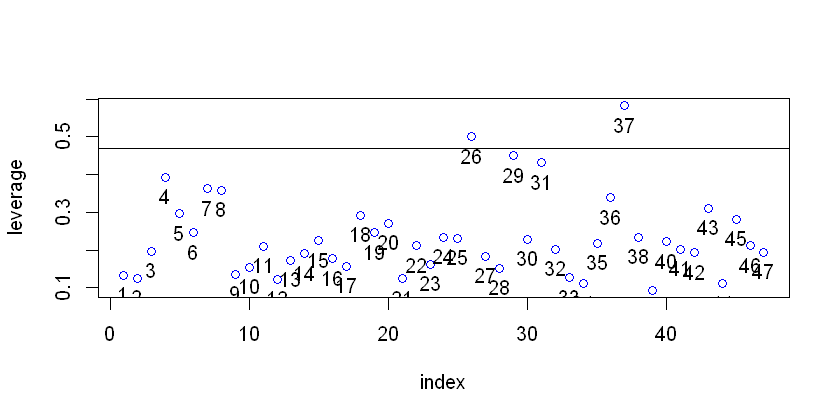

In [15]:
# Leverage
p = dim(X)[2]
n =  dim(X)[1]
# La funcion hat obtiene la diagonal de matriz sombrero
h = hat(X)
options(repr.plot.width=7,repr.plot.height=3.5)
plot(h, xlab = "index", ylab = "leverage",col="blue")
abline(h = 2 * (p + 1)/n)
text(h, pos = 1)

Las observaciones 26 y 37 estan alejados de la zona de muestra y habrá que revisarlas

#### Outliers
Es un punto que no ajusta en el modelo.
$s^2$ para $e_i$ no es constante, lo que hace difícil identificar las observaciones con residuos grandes. Por ello es usual estandarizarlos, se definen los residuos estandarizados como:
$$
r_i=\dfrac{e_i}{\hat{\sigma}\sqrt{1-h_{ii}}}
$$
Los residuos estandarizados tienen media cero y varianza próxima a 1, ésto permite distinguir a los residuos grandes.
Una observación con residuo grande se denominan dato atípico (outlier), normalmente se considera que una observación es un dato atípico si tiene un residuo estandarizado que no se encuentren en una banda entre $-3$ y $3$.

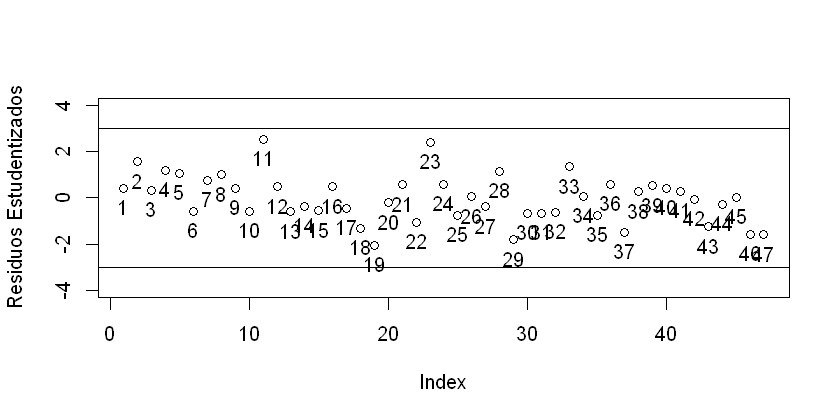

In [26]:
s2 = anova(modelo)$"Mean Sq"[11]
resstud = resid/sqrt(s2 * (1 - h))
plot(resstud, xlab = "Index", ylab = "Residuos Estudentizados", ylim = c(-4, 4))
abline(h = c(-3, 3))
text(resstud, pos = 1)